In [305]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [306]:
df = pd.read_csv('house_price_mumbai.csv')

In [307]:
df.drop_duplicates(inplace=True)

In [308]:
df.dtypes

BHK           object
project       object
Location      object
City          object
Total sqft     int64
price_sqft    object
price         object
dtype: object

In [309]:
df['BHK'].unique()

array(['3 BHK Apartment', '2 BHK Apartment', '1 BHK Independent House',
       '1 BHK Apartment', '1 RK Studio Apartment', '1', '4 BHK Apartment',
       'R', '3', '2', '5 BHK Independent Floor',
       '6 BHK Independent Floor', '3 BHK Independent Floor',
       '3 BHK Independent House', '3 BHK Villa', '4',
       '2 BHK Independent Floor', '5', '2 RK Studio Apartment',
       '5 BHK Independent House', '6', '5 BHK Apartment',
       '2 BHK Independent House'], dtype=object)

In [310]:
def fun(x):
    if len(x) != 1:
        s=str(x).split(" ")[0]
        return s
    else:
        return x
    

df['BHK'] = df['BHK'].map(lambda x: fun(x))
# i=df[df['BHK']=='R'].index
df.drop(df[df['BHK']=='R'].index, axis=0,inplace=True)
df['BHK'].unique()

array(['3', '2', '1', '4', '5', '6'], dtype=object)

In [311]:
df.drop(df[df['project'].isnull()].index, axis=0, inplace=True)

In [312]:
df.shape

(2166, 7)

In [313]:
df['Location']=df['Location'].map(lambda x: str(x).strip())
df['Location']=df['Location'].map(lambda x: str(x).title())
df['Location'].unique()

array(['Chembur', 'Kurla', 'Malad West', 'Rasayani', 'Vikhroli', 'Neral',
       'Mahim', 'Fort', 'Dombivali', 'Palghar', 'Malad East', 'Vangani',
       'Jogeshwari West', 'Dahisar', 'Borivali East', 'Mulund West',
       'Kharghar', 'Vasai', 'Santacruz East', 'Ambernath East',
       'Andheri West', 'Mazagaon', 'Karjat', 'Khopoli', 'Goregaon East',
       'Panvel', 'Kalyan West', 'Andheri East', 'Dronagiri', 'Umroli',
       'Virar', 'Kalyan East', 'Thane West', 'Shahapur', 'Taloja', 'Ulwe',
       'Titwala', 'Diva', 'Kamothe', 'Bhiwandi', 'Kandivali West',
       'Powai', 'Badlapur West', 'Mira Road East', 'Vasai East', 'Wada',
       'Sion', 'Badlapur East', 'Santacruz West', 'Nala Sopara',
       'Borivali West', 'Nerul', 'Ghatkopar West', 'Karanjade',
       'Kanjurmarg', 'Anjurdive', 'Navade', 'Airoli', 'Goregaon West',
       'Bandra West', 'Kamathipura', 'Bhayandar West', 'Dadar East',
       'Bhayandar East', 'Sanpada', 'Jogeshwari East', 'Kalwa',
       'Koper Khairane', 'Du

In [314]:
df['Location'].unique()

array(['Chembur', 'Kurla', 'Malad West', 'Rasayani', 'Vikhroli', 'Neral',
       'Mahim', 'Fort', 'Dombivali', 'Palghar', 'Malad East', 'Vangani',
       'Jogeshwari West', 'Dahisar', 'Borivali East', 'Mulund West',
       'Kharghar', 'Vasai', 'Santacruz East', 'Ambernath East',
       'Andheri West', 'Mazagaon', 'Karjat', 'Khopoli', 'Goregaon East',
       'Panvel', 'Kalyan West', 'Andheri East', 'Dronagiri', 'Umroli',
       'Virar', 'Kalyan East', 'Thane West', 'Shahapur', 'Taloja', 'Ulwe',
       'Titwala', 'Diva', 'Kamothe', 'Bhiwandi', 'Kandivali West',
       'Powai', 'Badlapur West', 'Mira Road East', 'Vasai East', 'Wada',
       'Sion', 'Badlapur East', 'Santacruz West', 'Nala Sopara',
       'Borivali West', 'Nerul', 'Ghatkopar West', 'Karanjade',
       'Kanjurmarg', 'Anjurdive', 'Navade', 'Airoli', 'Goregaon West',
       'Bandra West', 'Kamathipura', 'Bhayandar West', 'Dadar East',
       'Bhayandar East', 'Sanpada', 'Jogeshwari East', 'Kalwa',
       'Koper Khairane', 'Du

In [315]:
df.drop('City', axis=1, inplace=True)
df

,BHK,project,Location,Total sqft,price_sqft,price
0,3,SHREE KRISHNA SangamChembur,Chembur,984,"31,000",3.05 Cr
1,2,Ekdanta 24 KaratKurla,Kurla,598,"23,913",1.42 Cr
2,2,Liberty Bay VueMalad West,Malad West,738,"21,000",1.54 Cr
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,"10,676",68.75 L
4,2,Mayfair The ViewVikhroli,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...,...
3974,1,Global Prestige Wing EVasai,Vasai,670,"5,223",35 L
3975,2,Global Prestige Wing EVasai,Vasai,966,"4,968",48 L
3977,1,Navkar Navkar CityNaigaon East,Naigaon East,610,"5,573",34 L
3978,1,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,"5,245",32 L


In [316]:
df.drop('project', axis=1, inplace=True)
df

,BHK,Location,Total sqft,price_sqft,price
0,3,Chembur,984,"31,000",3.05 Cr
1,2,Kurla,598,"23,913",1.42 Cr
2,2,Malad West,738,"21,000",1.54 Cr
3,3,Rasayani,644,"10,676",68.75 L
4,2,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...
3974,1,Vasai,670,"5,223",35 L
3975,2,Vasai,966,"4,968",48 L
3977,1,Naigaon East,610,"5,573",34 L
3978,1,Naigaon East,610,"5,245",32 L


In [317]:
df = df.reset_index()

In [318]:
df.drop('index', inplace=True, axis=1)

In [319]:
def fun(x):
    if 'Cr' in x or 'cr' in x:
        s = str(x).split(" ")[0]
        s1 = str(int(float(s)*100))
        return s1
    else:
        s=str(x).split(" ")[0]
        return s

In [320]:
df['price']=df['price'].map(lambda x: fun(x))

In [321]:
df['price']

0         305
1         142
2         154
3       68.75
4         145
        ...  
2161       35
2162       48
2163       34
2164       32
2165       36
Name: price, Length: 2166, dtype: object

In [322]:
df['price_sqft']=df['price_sqft'].map(lambda x: str(x).strip())

In [323]:
def fun1(x):
    if "," in str(x):
        s=''.join(str(x).split(","))
        return s
    else:
        return x
    
df['price_sqft']=df['price_sqft'].map(lambda x: fun1(x))

In [324]:
df['price_sqft']

0       31000
1       23913
2       21000
3       10676
4       24914
        ...  
2161     5223
2162     4968
2163     5573
2164     5245
2165     6101
Name: price_sqft, Length: 2166, dtype: object

In [325]:
df

,BHK,Location,Total sqft,price_sqft,price
0,3,Chembur,984,31000,305
1,2,Kurla,598,23913,142
2,2,Malad West,738,21000,154
3,3,Rasayani,644,10676,68.75
4,2,Vikhroli,582,24914,145
...,...,...,...,...,...
2161,1,Vasai,670,5223,35
2162,2,Vasai,966,4968,48
2163,1,Naigaon East,610,5573,34
2164,1,Naigaon East,610,5245,32


In [326]:
df['BHK']=df['BHK'].astype('int')
df['Total sqft']=df['Total sqft'].astype('int')
df['price_sqft']=df['price_sqft'].astype('int')
df['price']=df['price'].astype('float')

In [327]:
df.dtypes

BHK             int64
Location       object
Total sqft      int64
price_sqft      int64
price         float64
dtype: object

In [328]:
df['Location'].value_counts()

Location
Mira Road East      195
Dombivali           166
Virar               144
Thane West          119
Naigaon East         89
                   ... 
Girgaon               1
Kasheli               1
Usarghar Gaon         1
Ville Parle East      1
Kanjurmarg East       1
Name: count, Length: 119, dtype: int64

In [329]:
df['Location'].value_counts()[df['Location'].value_counts()>2]

Location
Mira Road East     195
Dombivali          166
Virar              144
Thane West         119
Naigaon East        89
                  ... 
Jogeshwari East      3
Napeansea Road       3
Goregaon West        3
Nilje Gaon           3
Dadar West           3
Name: count, Length: 85, dtype: int64

In [330]:
df['Location']

0            Chembur
1              Kurla
2         Malad West
3           Rasayani
4           Vikhroli
            ...     
2161           Vasai
2162           Vasai
2163    Naigaon East
2164    Naigaon East
2165    Naigaon East
Name: Location, Length: 2166, dtype: object

In [331]:
df['Location'].value_counts()[:60]

Location
Mira Road East          195
Dombivali               166
Virar                   144
Thane West              119
Naigaon East             89
Malad West               74
Kharghar                 73
Kandivali East           54
Mulund West              50
Panvel                   50
Karjat                   49
Vasai                    46
Malad East               43
Chembur                  42
Bhandup West             41
Airoli                   41
Dahisar                  36
Andheri West             35
Badlapur West            35
Powai                    31
Kalyan West              31
Borivali West            30
Kandivali West           27
Palghar                  25
Jogeshwari West          23
Goregaon East            23
Koper Khairane           23
Kurla                    21
Taloja                   20
Rasayani                 19
Borivali East            19
Byculla                  19
Nala Sopara              18
Sion                     17
Ghansoli                 16
Bandra West

In [332]:
df

,BHK,Location,Total sqft,price_sqft,price
0,3,Chembur,984,31000,305.00
1,2,Kurla,598,23913,142.00
2,2,Malad West,738,21000,154.00
3,3,Rasayani,644,10676,68.75
4,2,Vikhroli,582,24914,145.00
...,...,...,...,...,...
2161,1,Vasai,670,5223,35.00
2162,2,Vasai,966,4968,48.00
2163,1,Naigaon East,610,5573,34.00
2164,1,Naigaon East,610,5245,32.00


In [333]:
df_groups = df.groupby(['Location'])['price_sqft'].mean()

In [334]:
df_groups

Location
Agripada            29618.000000
Airoli              13846.146341
Ambernath East       4635.818182
Ambernath West       4140.500000
Andheri East        24216.250000
                        ...     
Ville Parle East    33000.000000
Virar                6932.145833
Wada                 5818.000000
Wadala              28595.428571
Worli               41036.666667
Name: price_sqft, Length: 119, dtype: float64

In [335]:
df.groupby("Location")['price'].mean().sort_values(ascending=False)

Location
Juhu              1900.000000
Prabhadevi         937.500000
Napeansea Road     783.333333
Worli              633.000000
Khar West          600.000000
                     ...     
Palghar             22.118800
Karjat              21.621837
Neral               19.360000
Dundare             18.620000
Umroli              17.916667
Name: price, Length: 119, dtype: float64

In [336]:
df_groups = df.groupby('Location')['Total sqft'].mean()

In [389]:
df_groups = df.groupby(['Location', 'BHK','Total sqft'])['price'].mean()

In [390]:
df_groups

Location  BHK  Total sqft
Agripada  1    545           170.0
               680           340.0
          2    825           140.0
               1270          350.0
               1650          345.0
                             ...  
Wadala    3    1811          380.0
               2740          490.0
Worli     2    1250          400.0
          3    1500          699.0
               1800          800.0
Name: price, Length: 1659, dtype: float64

In [391]:
lc1=[]
bhk2=[]
total_sq_ft=[]
price=list(df_groups.values)

for i in df_groups.index:
    lc1.append([i][0][0])
    bhk2.append([i][0][1])
    total_sq_ft.append([i][0][2])

In [216]:
lc1

['Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Ambernath East',
 'Ambernath East',
 'Ambernath East',
 'Ambernath East',
 'Ambernath East',
 'Ambernath East',
 'Ambernath East',
 'Ambernath East',
 'Ambernath East',
 'Ambernath East',
 'Ambernath West',
 'Ambernath West',
 'Ambernath West',
 'Ambernath West',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri East',
 'Andheri West',
 'Andheri West',
 'Andheri West',
 'Andheri West',
 'Andheri West',
 'Andheri West',
 'Andheri West',
 'Andh

In [217]:
bhk2

[1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,


In [394]:
data=pd.DataFrame()
df_groups.index[0]
data['location']=lc1
data['total_sqft']=total_sq_ft
data['bhk']=bhk2
data['price']=price

In [395]:
data[:50]

,location,total_sqft,bhk,price
0,Agripada,545,1,170.000
1,Agripada,680,1,340.000
2,Agripada,825,2,140.000
3,Agripada,1270,2,350.000
4,Agripada,1650,2,345.000
5,Agripada,1350,3,670.000
6,Agripada,1716,3,450.000
7,Agripada,2062,3,425.000
8,Agripada,3646,3,1200.000
9,Agripada,3500,4,1011.000


In [396]:
data.dtypes

location       object
total_sqft      int64
bhk             int64
price         float64
dtype: object

In [397]:
data['price'][2]

np.float64(140.0)

In [398]:
compos = data[data['bhk']>4].index
data.drop(compos, axis=0, inplace=True)


In [399]:
data.reset_index(inplace=True)

In [400]:
data.drop('index', axis=1, inplace=True)

In [402]:
data

,location,total_sqft,bhk,price
0,Agripada,545,1,170.0
1,Agripada,680,1,340.0
2,Agripada,825,2,140.0
3,Agripada,1270,2,350.0
4,Agripada,1650,2,345.0
...,...,...,...,...
1647,Wadala,1811,3,380.0
1648,Wadala,2740,3,490.0
1649,Worli,1250,2,400.0
1650,Worli,1500,3,699.0


In [403]:
l4=list(df.groupby("Location")['price'].mean().sort_values(ascending=False)[:55].index)

In [404]:
l4

['Juhu',
 'Prabhadevi',
 'Napeansea Road',
 'Worli',
 'Khar West',
 'Khar',
 'Cuffe Parade',
 'Lower Parel',
 'Santacruz West',
 'Bandra West',
 'Agripada',
 'Madanpura',
 'Dadar West',
 'Matunga',
 'Mazagaon',
 'Bandra Kurla Complex',
 'Peddar Road',
 'Dadar East',
 'Goregaon East',
 'Sewri',
 'Santacruz East',
 'Wadala',
 'Jogeshwari East',
 'Mazgaon',
 'Powai',
 'Fort',
 'Sion',
 'Lbs Marg',
 'Byculla',
 'Nerul',
 'Kamathipura',
 'Ville Parle East',
 'Mahim',
 'Girgaon',
 'Mulund East',
 'Ghatkopar West',
 'Nahur East',
 'Malad East',
 'Mulund West',
 'Seawoods',
 'Borivali West',
 'Sector-20 Koparkhairane',
 'Sanpada',
 'Andheri West',
 'Ghansoli',
 'Chembur',
 'Kandivali East',
 'Kanjurmarg East',
 'Jogeshwari West',
 'Andheri East',
 'Koper Khairane',
 'Kharghar',
 'Goregaon West',
 'Malad West',
 'Thane West']

In [405]:
data

,location,total_sqft,bhk,price
0,Agripada,545,1,170.0
1,Agripada,680,1,340.0
2,Agripada,825,2,140.0
3,Agripada,1270,2,350.0
4,Agripada,1650,2,345.0
...,...,...,...,...
1647,Wadala,1811,3,380.0
1648,Wadala,2740,3,490.0
1649,Worli,1250,2,400.0
1650,Worli,1500,3,699.0


In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1652 non-null   object 
 1   total_sqft  1652 non-null   int64  
 2   bhk         1652 non-null   int64  
 3   price       1652 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 51.8+ KB


In [407]:
data.location.value_counts()

location
Dombivali           112
Mira Road East      107
Virar                92
Thane West           88
Kharghar             60
                   ... 
Usarghar Gaon         1
Ville Parle East      1
Vikroli East          1
Vichumbe              1
Wada                  1
Name: count, Length: 119, dtype: int64

In [408]:
data = data.join(pd.get_dummies(data.location))
data = data.drop('location', axis=1)

In [409]:
data

,total_sqft,bhk,price,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Vasai East,Vasind,Vichumbe,Vikhroli,Vikroli East,Ville Parle East,Virar,Wada,Wadala,Worli
0,545,1,170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,680,1,340.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,825,2,140.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1270,2,350.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1650,2,345.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1811,3,380.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1648,2740,3,490.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1649,1250,2,400.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1650,1500,3,699.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [410]:
data.dtypes

total_sqft            int64
bhk                   int64
price               float64
Agripada               bool
Airoli                 bool
                     ...   
Ville Parle East       bool
Virar                  bool
Wada                   bool
Wadala                 bool
Worli                  bool
Length: 122, dtype: object

<Axes: >

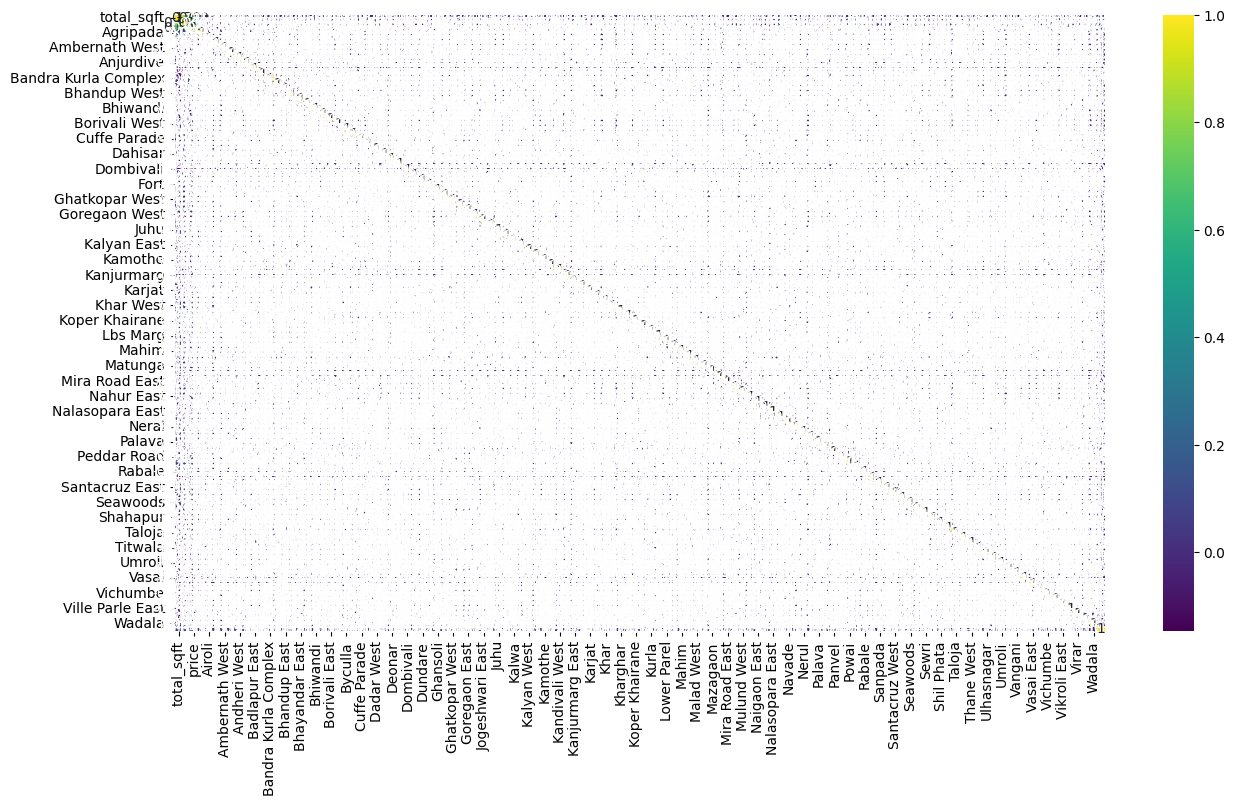

In [411]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="viridis")

In [412]:
target_corr = data.corr()['price'].apply(abs).sort_values(ascending=False)

In [413]:
target_corr

price             1.000000e+00
total_sqft        6.872863e-01
bhk               6.188811e-01
Juhu              2.859517e-01
Prabhadevi        2.603926e-01
                      ...     
Borivali East     3.757178e-03
Bhayandar West    3.285183e-03
Goregaon West     3.007217e-03
Kanjurmarg        2.620707e-03
Ghatkopar East    5.873771e-08
Name: price, Length: 122, dtype: float64

In [414]:
data

,total_sqft,bhk,price,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Vasai East,Vasind,Vichumbe,Vikhroli,Vikroli East,Ville Parle East,Virar,Wada,Wadala,Worli
0,545,1,170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,680,1,340.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,825,2,140.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1270,2,350.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1650,2,345.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1811,3,380.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1648,2740,3,490.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1649,1250,2,400.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1650,1500,3,699.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [415]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X, y = data.drop('price', axis=1), data['price']

In [416]:
X

,total_sqft,bhk,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,...,Vasai East,Vasind,Vichumbe,Vikhroli,Vikroli East,Ville Parle East,Virar,Wada,Wadala,Worli
0,545,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,680,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,825,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1270,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1650,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1811,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1648,2740,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1649,1250,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1650,1500,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [417]:
y

0       170.0
1       340.0
2       140.0
3       350.0
4       345.0
        ...  
1647    380.0
1648    490.0
1649    400.0
1650    699.0
1651    800.0
Name: price, Length: 1652, dtype: float64

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [419]:
rfr_model = RandomForestRegressor()
lr_model = LinearRegression()

In [420]:
param_gridrfr = {
    "max_depth": [5,10,15,20],
    "n_estimators": [2,3,4,5,6,7,8,9,10]
}

gridrfr = GridSearchCV(rfr_model, param_grid=param_gridrfr)

In [421]:
gridrfr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [422]:
gridrfr.best_params_

{'max_depth': 20, 'n_estimators': 9}

In [423]:
gridrfr_pred = gridrfr.predict(X_test)

In [424]:
mean_absolute_error(y_test, gridrfr_pred)

43.57331862164995

In [425]:
gridrfr.score(X_test, y_test)

0.7029558088184773

In [426]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [427]:
rfr_pred = rfr_model.predict(X_test)

In [428]:
rfr_pred

array([ 31.2511    , 354.55      ,  51.78755   ,  61.234     ,
        32.178     ,  14.291     , 317.236     , 151.08416667,
       146.95154762, 145.915     ,  64.6338    ,  49.0643    ,
        84.64      ,  34.38386   , 119.6       ,  36.0568    ,
       172.615     , 151.48656667, 262.28      , 185.27833333,
       100.001     , 250.20833333,  66.47046667,  14.3782    ,
        52.7008    ,  18.3876    , 110.19294667,  43.42575   ,
       175.155     ,  51.2141    , 126.4018    ,  37.1741    ,
        90.73393333,  34.210425  ,  39.0699    ,  66.8734    ,
       138.849     ,  37.5649    ,  68.4523    , 163.6089    ,
        69.0582    , 437.25      ,  40.7448    ,  88.1155    ,
       175.27      ,  34.408     ,  37.8525    ,  40.9986    ,
        56.0456    , 119.8759    ,  32.2097    ,  51.834     ,
        83.52333333, 106.93033333, 318.62      ,  27.8875    ,
        35.2977    , 148.04      ,  69.9033    ,  68.38135   ,
        27.3831    , 129.17832667,  31.8551    ,  84.12

In [444]:
test = [X_test.iloc[36]]

In [445]:
test

[total_sqft           1240
 bhk                     2
 Agripada            False
 Airoli              False
 Ambernath East      False
                     ...  
 Ville Parle East    False
 Virar               False
 Wada                False
 Wadala              False
 Worli               False
 Name: 730, Length: 121, dtype: object]

In [446]:
pre = rfr_model.predict(test)

In [447]:
pre[0]

np.float64(138.849)

In [448]:
y_test.iloc[36]

np.float64(130.0)

In [434]:
mean_absolute_error(y_test, rfr_pred)

35.38055139955882

In [438]:
rfr_model.score(X_test, y_test)

0.7396893030472016

In [436]:
X.columns

Index(['total_sqft', 'bhk', 'Agripada', 'Airoli', 'Ambernath East',
       'Ambernath West', 'Andheri East', 'Andheri West', 'Anjurdive',
       'Badlapur East',
       ...
       'Vasai East', 'Vasind', 'Vichumbe', 'Vikhroli', 'Vikroli East',
       'Ville Parle East', 'Virar', 'Wada', 'Wadala', 'Worli'],
      dtype='object', length=121)

In [437]:
columns_list = X.columns.tolist()
columns_list

['total_sqft',
 'bhk',
 'Agripada',
 'Airoli',
 'Ambernath East',
 'Ambernath West',
 'Andheri East',
 'Andheri West',
 'Anjurdive',
 'Badlapur East',
 'Badlapur West',
 'Bandra Kurla Complex',
 'Bandra West',
 'Bhandup East',
 'Bhandup West',
 'Bhayandar East',
 'Bhayandar West',
 'Bhiwandi',
 'Boisar',
 'Borivali East',
 'Borivali West',
 'Byculla',
 'Chembur',
 'Cuffe Parade',
 'Dadar East',
 'Dadar West',
 'Dahisar',
 'Deonar',
 'Diva',
 'Dombivali',
 'Dronagiri',
 'Dundare',
 'Fort',
 'Ghansoli',
 'Ghatkopar East',
 'Ghatkopar West',
 'Girgaon',
 'Goregaon East',
 'Goregaon West',
 'Jogeshwari East',
 'Jogeshwari West',
 'Juhu',
 'Kalamboli',
 'Kalwa',
 'Kalyan East',
 'Kalyan West',
 'Kamathipura',
 'Kamothe',
 'Kandivali East',
 'Kandivali West',
 'Kanjurmarg',
 'Kanjurmarg East',
 'Karanjade',
 'Karjat',
 'Kasheli',
 'Khar',
 'Khar West',
 'Kharghar',
 'Khopoli',
 'Koper Khairane',
 'Koproli',
 'Kurla',
 'Lbs Marg',
 'Lower Parel',
 'Madanpura',
 'Mahim',
 'Malad East',
 'Malad

In [449]:
import joblib

joblib.dump(rfr_model, 'model.pkl')

['model.pkl']